In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time, datetime

import lkmodels as lkm
import lkhelpers as lkh

### Funciones

In [2]:
# modelos para probar
models = {
# distance models
#    'centroide' : lambda s,p: lkm.scores_centroide(s,p,robust=False)
#    ,'centroide_robust': lambda s,p: lkm.scores_centroide(s,p,robust=True)
#    ,'distancias': lambda s,p: lkm.scores_distancias(s,p,robust=False)
#    ,'distancias_robust': lambda s,p: lkm.scores_distancias(s,p,robust=True)
# class models
#    ,'logistic': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='logistic', penalty='l2')
#    ,'tree': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='tree', min_samples_leaf=1)
#    ,'rf': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='rf', min_samples_leaf=10,
#                                     n_estimators=10, max_features='sqrt')
# bagged models        
    'bagged50_logistic': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='logistic' 
                                                           ,T=50,penalty='none')
    ,'sbagged50_logistic': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='logistic' 
                                                           ,T=50, l1=0, penalty='none')

#     ,'bagged50_tree': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='tree' 
#                                                            ,T=50, min_samples_leaf=1)
#     ,'sbagged50_tree': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='tree' 
#                                                            ,T=50, l1=0, min_samples_leaf=1)

#     ,'bagged50_tree_flex': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='tree' 
#                                                            ,T=50, min_samples_leaf=1)
#     ,'sbagged50_tree_flex': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='tree' 
#                                                            ,T=50, l1=0, min_samples_leaf=1)
}

In [3]:
# resultados de cada modelo en un dataset dado
def lk_report(X, y, idx_hidden, models_dict):
    X_seed = X[y == 1,:]
    X_poblacion = X[y == 0,:]
    metrics = dict()
    times = dict()
    for k,f in models.items():
        t0 = time.time()
        scores = f(X_seed, X_poblacion)
        metrics[k] = lkh.avg_precision(y, idx_hidden, scores) * 100
        times[k] = (time.time() - t0) / 60
    df = pd.DataFrame({'precision': metrics, 'time': times})
    return df

### Simulación

In [4]:
rng = np.random.RandomState(999)
datasets = dict()

datasets['baseline'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.90, 0.10]
                                       ,n_informative=15, n_redundant=5, n_repeated=0)
datasets['baseline2'] = lkh.make_dataset(rng, n_samples=10000, n_features=2, weights=[0.80, 0.20]
                                       ,n_informative=2, n_redundant=0, n_repeated=0)
# datasets['low_dim'] = lkh.make_dataset(rng, n_samples=10000, n_features=5, weights=[0.90, 0.10]
#                                        ,n_informative=5, n_redundant=0, n_repeated=0)
# datasets['high_dim'] = lkh.make_dataset(rng, n_samples=10000, n_features=200, weights=[0.70, 0.30]
#                                        ,n_informative=15, n_redundant=0, n_repeated=0, flip_y=0.5)
# datasets['contaminated'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.70, 0.30]
#                                        ,n_informative=15, n_redundant=5, n_repeated=0, flip_y=0.5)
# datasets['no_sep'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.90, 0.10]
#                                        ,n_informative=15, n_redundant=5, n_repeated=0, class_sep=0.5)
# datasets['clusters'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.90, 0.10]
#                                        ,n_informative=15, n_redundant=5, n_repeated=0, n_clusters_per_class=4)

In [5]:
rdos = dict()
for k,v in datasets.items():
    rdos[k] = lk_report(v[0], v[1], v[2], models)
    print(f'{datetime.datetime.now()}: {k} DONE ---')

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

[0.91851783 0.94889103 0.92386892 0.96279758 0.93660229 0.86109745
 0.8887735  0.94128983 0.97673807 0.92157377 0.96564389 0.95177526
 0.90401593 0.96316633 0.93932818 0.89936516 0.9524121  0.95892393
 0.92632161 0.94298362 0.98252106 0.9378776  0.96944594 0.93379789
 0.96177997 0.96155874 0.93959736 0.94340635 0.98135118 0.95432049
 0.91529526 0.96239963 0.98021532 0.96020109 0.95633344 0.94058364
 0.94390426 0.96173627 0.95622929 0.93017885 0.97478485 0.93829642
 0.94763945 0.95354152 0.9795391  0.95719883 0.96440411 0.9670933
 0.93107031 0.94463331 0.93085556 0.96885832 0.96351709 0.93759759
 0.93528177 0.94035459 0.94561256 0.92057188 0.92520899 0.94306696
 0.91662574 0.93140078 0.89070022 0.93758678 0.94821793 0.95644328
 0.95141828 0.95517784 0.92387114 0.97349921 0.93763281 0.96398984
 0.96732533 0.97733453 0.96388127 0.96396256 0.96718138 0.86080916
 0.92957036 0.9333833  0.94515954 0.92814732 0.96791193 0.93670741
 0.93947903 0.97283078 0.90619202 0.94135219 0.97590219 0.91281

[0.76123793 0.89983292 0.91027237 0.90206328 0.92834276 0.92670272
 0.90238322 0.87264964 0.78323939 0.92598771 0.8643027  0.86614222
 0.88215029 0.9151755  0.91019356 0.93247311 0.86060265 0.9556495
 0.91915795 0.91225648 0.96115543 0.91620358 0.81823397 0.90635916
 0.91978539 0.86961684 0.92274777 0.95513866 0.94114789 0.85313756
 0.92203587 0.94624564 0.96256299 0.83677189 0.91034011 0.94292884
 0.90308687 0.87036506 0.88582238 0.91205762 0.91341094 0.8826508
 0.87790244 0.88592357 0.89709238 0.90843541 0.8756104  0.83313196
 0.72985672 0.92045516 0.8494535  0.88452468 0.8389881  0.94651396
 0.89403331 0.92624135 0.82240826 0.91861331 0.94878941 0.93014229
 0.96521555 0.91657343 0.89250126 0.93393589 0.9419253  0.85761064
 0.93323731 0.95075319 0.91538684 0.76842331 0.91867361 0.9250288
 0.91931802 0.93544361 0.86341783 0.88899059 0.93266007 0.85282449
 0.92054985 0.93806233 0.93221413 0.82092991 0.89386698 0.91534427
 0.75115865 0.92727346 0.95392852 0.79974447 0.76199085 0.9118173

[0.92564851 0.83649147 0.79478385 0.87989243 0.88675844 0.82391806
 0.88179645 0.80363602 0.78280261 0.91393847 0.87577852 0.90560556
 0.83888524 0.72587136 0.77705758 0.9140694  0.93756615 0.76601288
 0.9047065  0.89293515 0.90305909 0.71726988 0.78073295 0.66706211
 0.89530927 0.80878097 0.93086582 0.80332677 0.79863313 0.84270122
 0.82886908 0.85711508 0.82821075 0.80824014 0.82889827 0.89690795
 0.82892847 0.85891758 0.84924013 0.76397279 0.77572004 0.93348073
 0.94598097 0.87577787 0.91206544 0.86232621 0.89254464 0.91142374
 0.75204682 0.85690234 0.94471699 0.79689192 0.82653094 0.6905278
 0.9350131  0.91187779 0.86181188 0.86770081 0.83627529 0.58657284
 0.89770772 0.84558287 0.90937444 0.79851776 0.84095421 0.85967032
 0.86796058 0.90034277 0.80008531 0.90583543 0.80177876 0.85557507
 0.84262966 0.88740016 0.83875768 0.8539957  0.83605007 0.9503161
 0.87063427 0.72298675 0.77933315 0.85027789 0.8376809  0.89808945
 0.80068533 0.90544131 0.79720764 0.95883923 0.83908623 0.642002

[0.70644789 0.80196189 0.7493373  0.62251435 0.7727078  0.83036153
 0.61963736 0.90716823 0.89939417 0.88113864 0.82901088 0.88876446
 0.84320546 0.80162737 0.80883843 0.83321119 0.755234   0.87629338
 0.66454488 0.77289008 0.80533509 0.95439438 0.89007055 0.79366067
 0.90753601 0.82859813 0.84708676 0.72774552 0.87099975 0.73936367
 0.80100525 0.78421897 0.72599738 0.7693317  0.84648445 0.7942126
 0.85664277 0.88000072 0.68939564 0.72212573 0.89387881 0.47182594
 0.8816123  0.91799581 0.69736537 0.8773976  0.76447272 0.87739794
 0.74351609 0.83302563 0.92207631 0.76982279 0.65837173 0.74366412
 0.74263695 0.75328424 0.81251282 0.63391779 0.74659303 0.83337804
 0.78853257 0.73755499 0.8739039  0.78066529 0.7795483  0.86453706
 0.9248831  0.84714829 0.89450388 0.73180484 0.72873472 0.83602732
 0.79961908 0.87804715 0.85370076 0.68112412 0.79503877 0.80938535
 0.67998955 0.7399166  0.77177168 0.505995   0.79985086 0.80709723
 0.92088162 0.86162757 0.65622546 0.9109127  0.6834389  0.84366

[0.71524432 0.63618653 0.30123943 0.68345422 0.5386046  0.70434054
 0.81323692 0.53629645 0.72648642 0.70621152 0.62763263 0.82306721
 0.63219299 0.71211542 0.81382174 0.27441826 0.78318394 0.77937078
 0.6926435  0.26452187 0.67521392 0.81727395 0.8333426  0.77384014
 0.65849205 0.61095321 0.71488346 0.69313629 0.22497625 0.86695427
 0.75316115 0.84898531 0.83634783 0.75482948 0.49634579 0.78044908
 0.67615801 0.61936514 0.76988429 0.84473277 0.62529213 0.77242835
 0.74489088 0.68915009 0.701664   0.90290308 0.92934111 0.72162527
 0.6628674  0.29947642 0.82694257 0.60549613 0.75436389 0.71529128
 0.67150951 0.74011259 0.62716286 0.71729585 0.88301089 0.59079921
 0.44115299 0.68811453 0.69448212 0.74713681 0.72565511 0.64818283
 0.32806448 0.77584373 0.79873702 0.69212116 0.68039422 0.49020321
 0.84460342 0.68262874 0.92290726 0.75091842 0.69331751 0.76297105
 0.61095321 0.76020661 0.57953829 0.59362366 0.65201039 0.63704638
 0.52958153 0.87883217 0.60580411 0.60279908 0.77794031 0.3135

[0.58148265 0.62830949 0.8729964  0.82985108 0.51410886 0.69761536
 0.73645795 0.64317899 0.1686912  0.86404789 0.63642409 0.7386667
 0.62765947 0.69505868 0.61754989 0.62836691 0.83943064 0.64947293
 0.69170132 0.5941651  0.70625654 0.52557303 0.59468764 0.85130729
 0.7381247  0.69314652 0.75889815 0.83549439 0.57597881 0.87195423
 0.54122747 0.79842914 0.67303336 0.65152752 0.49482351 0.71438166
 0.71942902 0.60985766 0.4170528  0.53237613 0.77478791 0.52822144
 0.68305866 0.81734072 0.81069531 0.65663198 0.65712458 0.8080118
 0.68961535 0.58722562 0.66467219 0.58792005 0.795112   0.54859941
 0.71032912 0.63755197 0.82997899 0.78138055 0.73361816 0.71746957
 0.72153554 0.88047827 0.45523625 0.88075149 0.4516343  0.60347542
 0.73407751 0.51859952 0.78468654 0.74422224 0.65014899 0.75566589
 0.60106083 0.82286996 0.67509319 0.5507831  0.67126476 0.67256918
 0.55271008 0.41492671 0.71802281 0.5054598  0.14297085 0.65034503
 0.78939107 0.7041477  0.80609055 0.57762972 0.24293451 0.520414

[0.86416705 0.76853493 0.92838321 ... 0.59373997 0.80226166 0.88439351] /n
[0.81566542 0.77501997 0.91450817 ... 0.76606713 0.89305513 0.94774474] /n
[0.83093144 0.93141535 0.88515202 ... 0.87511249 0.61144656 0.92256014] /n
[0.86872925 0.39630829 0.62212346 ... 0.93374719 0.75471808 0.76238633] /n
[0.55073952 0.93801456 0.3905061  ... 0.68587218 0.8843198  0.91098337] /n
[0.94274642 0.90576919 0.92246079 ... 0.87282427 0.9428856  0.89101534] /n
[0.74733826 0.82635225 0.93720257 ... 0.94974422 0.41397173 0.92698925] /n
[0.95372675 0.69011643 0.74990679 ... 0.79915071 0.60425498 0.72230079] /n
[0.9004271  0.98028623 0.89774833 ... 0.53478108 0.51025185 0.75267906] /n
[0.88253244 0.82361637 0.79313203 ... 0.41416707 0.95310668 0.91379292] /n
[0.55355825 0.78787492 0.54571211 ... 0.95198581 0.80277179 0.83313341] /n
[0.95258807 0.43259528 0.92751308 ... 0.75001488 0.96165921 0.8911224 ] /n
[0.65865319 0.50367824 0.90334969 ... 0.60876064 0.61351045 0.81170849] /n
[0.39218183 0.58654244 0.

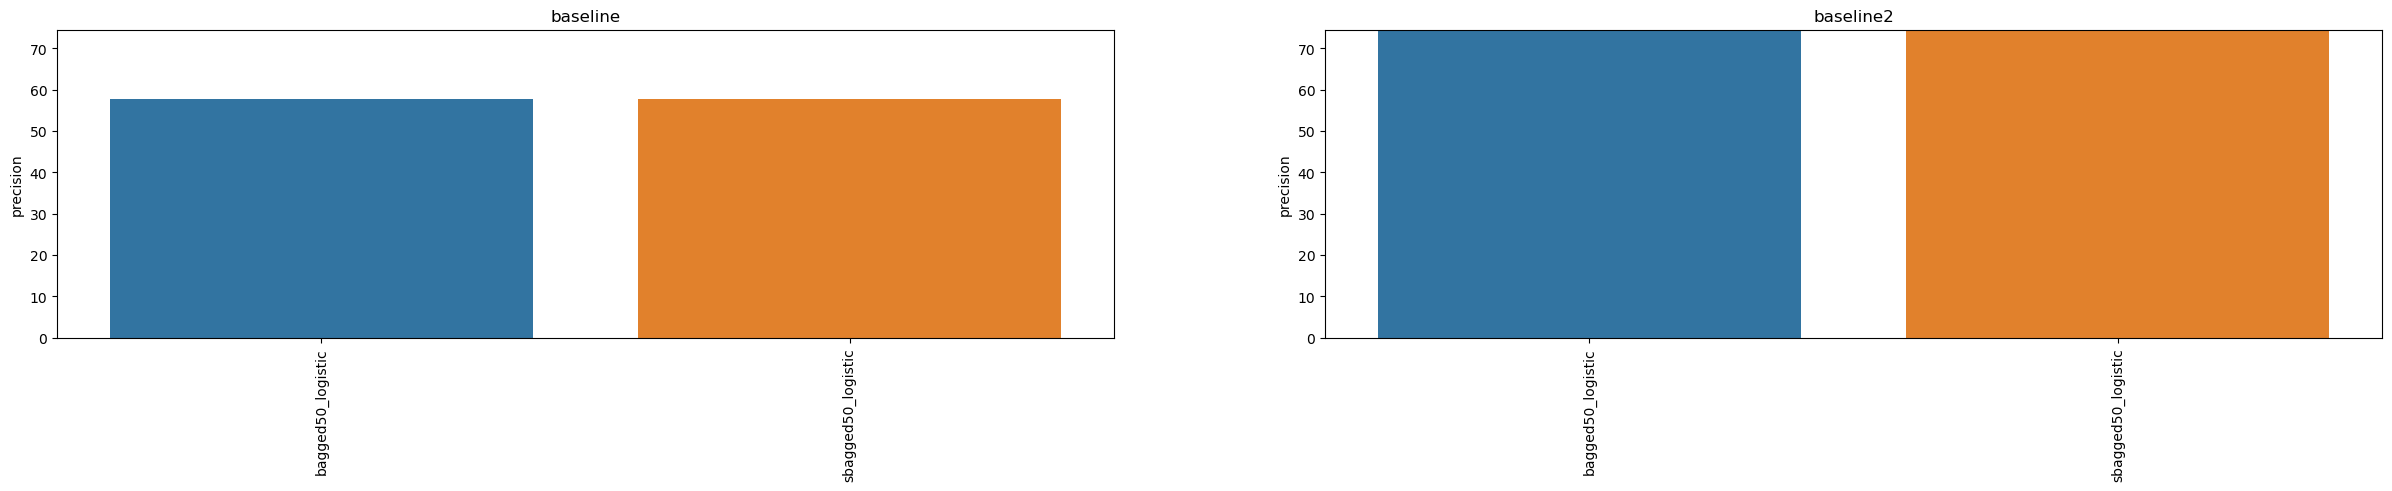

In [6]:
# plot metrics
f, axs = plt.subplots(figsize=(30,4), nrows=1, ncols=len(rdos.keys()))
max_precision = pd.concat(rdos)['precision'].max()
i = 0
for name, df in rdos.items():
    sns.barplot(x=df.index, y=df['precision'], ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_ylim(0, max_precision)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    i += 1

In [7]:
# result example
# rdos['baseline']
rdos['baseline2']
# rdos['low_dim']
# rdos['high_dim']
# rdos['contaminated']
# rdos['no_sep']

,precision,time
bagged50_logistic,74.480962,0.003834
sbagged50_logistic,74.521787,0.004851


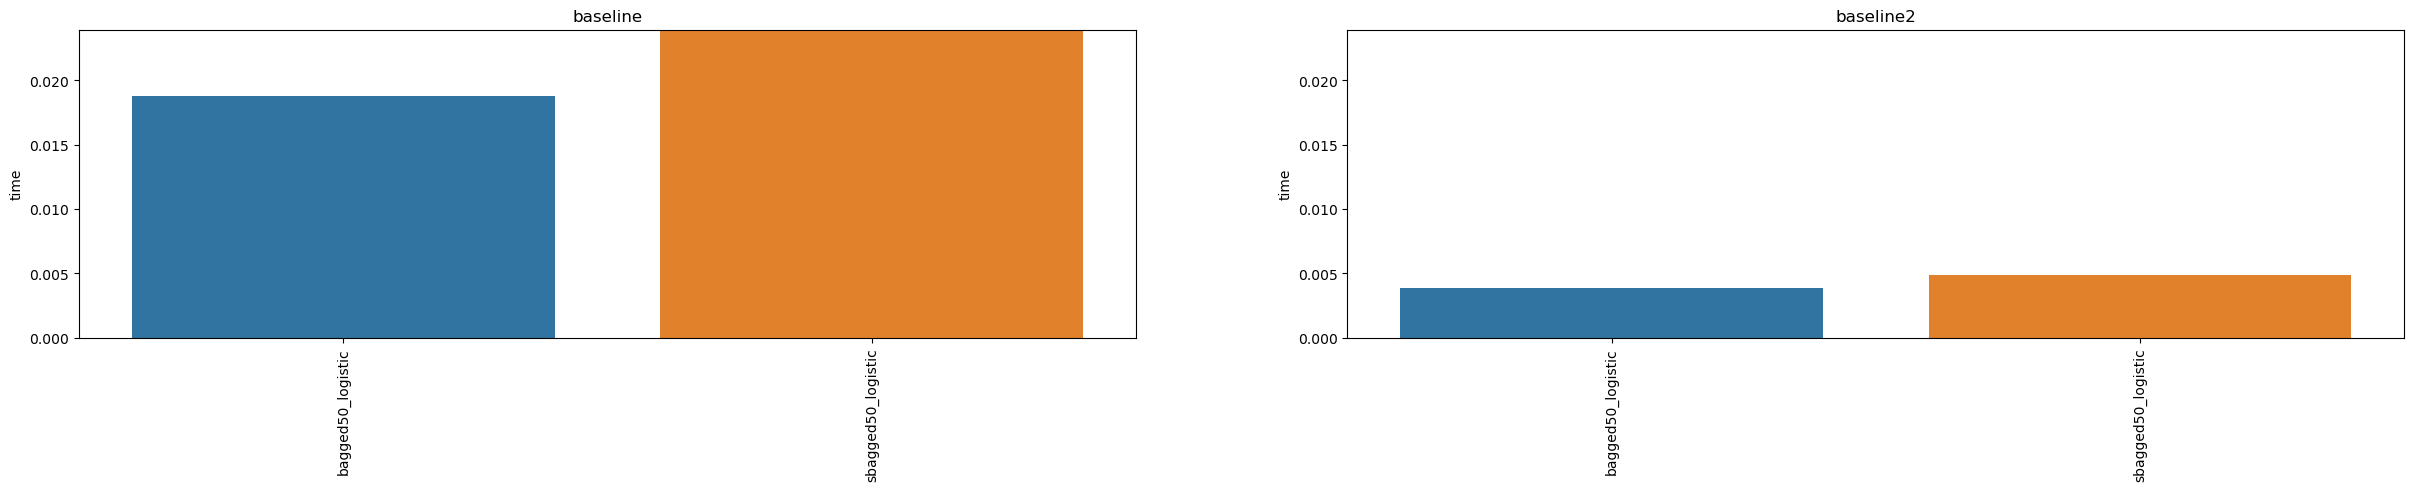

In [8]:
# plot time
# plot metrics
f, axs = plt.subplots(figsize=(30,4), nrows=1, ncols=len(rdos.keys()))
max_precision = pd.concat(rdos)['time'].max()
i = 0
for name, df in rdos.items():
    sns.barplot(x=df.index, y=df['time'], ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_ylim(0, max_precision)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    i += 1